In [161]:
import numpy as np
import pandas as pd

In [162]:
import warnings
warnings.filterwarnings("ignore")

In [163]:
bd = pd.read_excel('hakaton_nn_1month.xlsx')

In [4]:
bd

,party_rk,region,offenceshortstatement,offencedate,offencetime,engine_type,engine_power,body_type,auto_mark,auto_year,...,gear_type,car_price,gender_cd,age,marital_status_cd,children_cnt,education_level_cd,person_monthly_income_amt,day_of_week,public_holiday
0,622025641,Москва,Движение по обочине,2024-05-15,09:52:48,1.8,152.00,Универсал (5 дв.),SKODA,2011.0,...,Автоматическая,712,M,23.0,UNM,0.0,UGR,80.0,Среда,f
1,696133759,Воронежская область,Превышение скорости на 40-60 км/ч,2024-05-13,17:54:58,1.6,73.00,Седан (4 дв.),LADA (ВАЗ),2011.0,...,Механическая,162,M,19.0,NaN,0.0,NaN,45.0,Понедельник,f
2,1057242004,Севастополь,Превышение скорости на 20-40 км/ч,2024-05-10,00:29:11,2.5,145.00,Микроавтобус (5 дв.),HYUNDAI,2018.0,...,Автоматическая,2601,M,43.0,NaN,NaN,NaN,500.0,Пятница,t
3,300624658,Республика Тыва,Превышение скорости на 20-40 км/ч,2024-05-02,21:44:46,2.0,150.00,Седан (4 дв.),MITSUBISHI,2007.0,...,Механическая,410,M,27.0,UNM,0.0,SCH,35.0,Четверг,f
4,702484296,Воронежская область,Превышение скорости на 20-40 км/ч,2024-04-28,16:25:51,2.3,155.00,Универсал (5 дв.),FORD,2004.0,...,Автоматическая,617,F,42.0,MAR,0.0,GRD,50.0,Воскресенье,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97302,697259855,Челябинская область,Превышение скорости на 20-40 км/ч,2024-05-16,09:53:16,2.5,171.00,Универсал (5 дв.),NISSAN,2019.0,...,Автоматическая,2258,F,40.0,NaN,0.0,NaN,200.0,Четверг,f
97303,621105050,Москва,Нарушение разметки,2024-05-22,18:47:59,1.6,98.00,Универсал (5 дв.),LADA (ВАЗ),2011.0,...,Автоматическая,318,M,41.0,MAR,0.0,GRD,125.0,Среда,f
97304,959033708,Брянская область,Превышение скорости на 20-40 км/ч,2024-05-14,16:08:38,1.6,109.00,Универсал (5 дв.),CHEVROLET,2007.0,...,Механическая,422,M,46.0,UNM,0.0,NaN,35.0,Вторник,f
97305,231902303,Москва,Не пропустил пешехода,2024-05-16,11:18:26,2.0,151.00,Хэтчбек (5 дв.),DODGE,2010.0,...,Автоматическая,552,M,32.0,MAR,0.0,GRD,200.0,Четверг,f


In [170]:
bd = bd[bd['engine_power'] <= 800][bd['engine_power'] >= 52]
bd = bd[bd['engine_type'] <= 10][bd['engine_type'] >= 0.8]
bd = bd[bd['age'] != 4]
bd = bd[bd['auto_year'] >= 2000]

In [23]:
bd.children_cnt.unique()

array([ 0., nan,  1.,  2.,  3.,  5.,  4.,  6.,  7.,  8.,  9.])

In [6]:
bd = bd[bd['age'] >= 18][bd['auto_year'] >= 2000]

<Axes: >

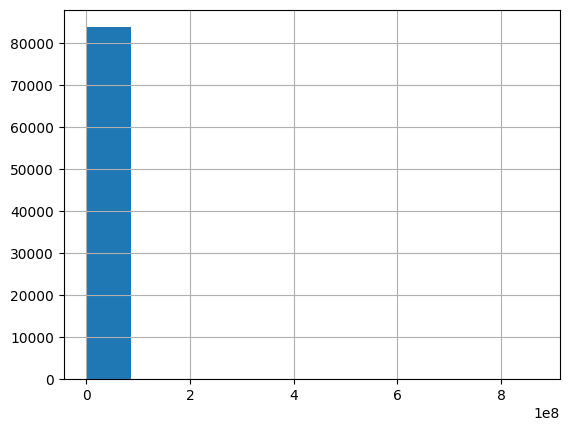

In [7]:
bd['person_monthly_income_amt'].hist()

In [8]:
bd['person_monthly_income_amt'].mean()

np.float64(10544.173549972562)

In [9]:
ForCorrel = bd.select_dtypes(include='number')
ForCorrel.corr()

,party_rk,auto_year,age,children_cnt,person_monthly_income_amt
party_rk,1.000000,-0.111355,-0.082164,-0.099770,-0.002960
auto_year,-0.111355,1.000000,0.131433,0.030747,-0.005645
age,-0.082164,0.131433,1.000000,0.137675,0.004075
children_cnt,-0.099770,0.030747,0.137675,1.000000,0.008323
person_monthly_income_amt,-0.002960,-0.005645,0.004075,0.008323,1.000000


In [10]:
# bd['engine_type'] = bd['engine_type'].astype('float')
bd['engine_type'].unique()

array(['1.8 ', '1.6 ', '2.5 ', '2.0 ', '2.3 ', '3.0 ', '2.4 ', '3.5 ',
       '2.1 ', '4.7 ', '1.4 ', '1.5 ', '2.9 ', '2.7 ', '3.6 ', '4.4 ',
       '6.2 ', '5.3 ', '4.0 ', '2.8 ', '4.2 ', '2.2 ', '3.7 ', '1.3 ',
       '5.5 ', '1.7 ', '4.5 ', '1.2 ', '5.0 ', '5.7 ', '3.2 ', '5.6 ',
       '0.0 ', '6.5 ', '1.0 ', '1.9 ', '0.6 ', '0.8 ', '3.8 ', '4.6 ',
       '0.00 ', '5.9 ', '6.0 ', '3.4 ', '4.1 ', '3.3 ', '999.0 ', '0.1 ',
       '6.1 ', '4.8 ', '6.7 ', '6.4 ', '1.1 ', '2.6 ', '4.3 ', '3.1 ',
       '6.8 ', '0.2 ', '14.5 ', '15.0 ', '0.7 ', 'Бензиновый на бензине',
       '18.0 ', '3.9 ', '5.2 ', '5.4 ', '0.65 ', '0.9 ', '5.8 ', '19.6 ',
       '13.6 ', '22.9 ', '6.6 ', '4.9 ', '16.0 ', '1', '3.7 i ', '24.8 ',
       '36.0 ', '12.0 ', '12.8 '], dtype=object)

In [165]:
bd = bd[bd['engine_type'] != 'Бензиновый на бензине']
bd['engine_type'] = bd['engine_type'].str.replace(' ', '').str.replace('i', '').astype('float')
# bd['engine_type'] = bd['engine_type'].astype('float')

In [12]:
bd['engine_power'].unique()

array(['152.00', '73.00', '145.00', '150.00', '155.00', '265.00',
       '249.00', '204.00', '435.00', '147.00', '192.00', '106.00',
       '211.00', '122.00', '105.00', '90.00', '125.00', '290.00',
       '306.00', '100.00', '181.00', '163.00', '184.00', '115.00',
       '76.00', '186.00', '107.00', '109.00', '190.00', '123.00',
       '140.00', '118.00', '194.00', '167.00', '166.00', '131.00',
       '77.00', '124.00', '179.00', '449.00', '75.00', '117.00', '160.00',
       '112.00', '110.00', '144.00', '431.00', '250.00', '426.00',
       '103.00', '139.00', '325.00', '136.00', '650.00', '102.00',
       '81.00', '182.00', '238.00', '126.00', '129.00', '401.00', '98.00',
       '82.00', '218.00', '141.00', '200.00', '172.00', '68.00', '280.00',
       '171.00', '421.00', '165.00', '170.00', '177.00', '277.00',
       '241.00', '74.00', '272.00', '116.00', '156.00', '247.00',
       '315.00', '231.00', '148.00', '95.00', '224.00', '87.00', '387.00',
       '89.00', '84.00', '230.00',

In [166]:
bd['engine_power'] = bd['engine_power'].str.replace(' ', '').str.replace('i', '').astype('float')

In [167]:
bd['auto_year'] = bd['auto_year'].dropna().astype('int')

In [168]:
bd['car_price'] = bd['car_price'][bd['car_price'] != ';M'].dropna().astype('float')

In [169]:
bd['offencetime'] = pd.to_datetime(bd['offencetime'], format='%H:%M:%S').dt.time

<Axes: >

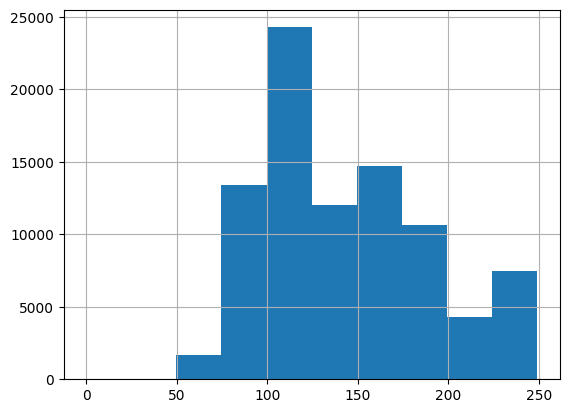

In [17]:
bd[bd['engine_power'] < 250]['engine_power'].hist()

<Axes: >

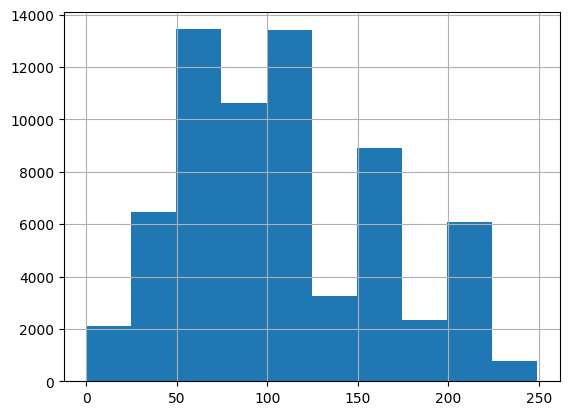

In [18]:
bd[bd['person_monthly_income_amt'] < 250]['person_monthly_income_amt'].hist()

In [9]:
etm = bd['engine_type'].mean()
etsigma = bd['engine_type'].std()

epm = bd['engine_power'].mean()
epsigma = bd['engine_power'].std()

pim = bd['person_monthly_income_amt'].mean()
pisigma = bd['person_monthly_income_amt'].std()

agem = bd['age'].mean()
agesigma = bd['age'].std()

bd = bd[ bd['person_monthly_income_amt'] < pim+2*pisigma ][ bd['person_monthly_income_amt'] > pim-2*pisigma ][ bd['engine_type'] < etm+2*etsigma ][ bd['engine_type'] > etm-2*etsigma ][ bd['engine_power'] < epm+2*epsigma ][ bd['engine_power'] > epm-2*epsigma ][ bd['age'] < agem+2*agesigma ]

In [20]:
bd.pivot_table(index='region', values='person_monthly_income_amt', aggfunc=['mean', 'count'])

,mean,count
,person_monthly_income_amt,person_monthly_income_amt
region,,
Алтайский край,170.075780,673
Амурская область,207.363636,33
Архангельская область,107.608696,92
Астраханская область,128.142012,169
Белгородская область,110.075829,211
...,...,...
Челябинская область,122.634490,2911
Чеченская республика,95.325581,172


In [273]:

bd["day_of_week"] = bd["day_of_week"].str.replace('Понедельник', "1")
bd["day_of_week"] = bd["day_of_week"].str.replace('Вторник', "2")
bd["day_of_week"] = bd["day_of_week"].str.replace('Среда', "3")
bd["day_of_week"] = bd["day_of_week"].str.replace('Четверг', "4")
bd["day_of_week"] = bd["day_of_week"].str.replace('Пятница', "5")
bd["day_of_week"] = bd["day_of_week"].str.replace('Суббота', "6")
bd["day_of_week"] = bd["day_of_week"].str.replace('Воскресенье', "7")
bd["day_of_week"] = bd["day_of_week"].astype('int')

In [26]:
bd['body_type'].value_counts()

body_type
Седан (4 дв.)                       29272
Универсал (5 дв.)                   25173
Хэтчбек (5 дв.)                     10650
Седан                                1822
Хэтчбек (3 дв.)                      1667
                                    ...  
Фастбек (4 дв.)                         1
Бортовой                                1
Шасси с двойной кабиной (2 дв.)         1
Грузопассажирский фургон (3 дв.)        1
Другой (3 дв.)                          1
Name: count, Length: 111, dtype: int64

In [30]:
Sedan = pd.DataFrame({'cSedan': bd[bd['body_type'] == 'Седан (4 дв.)']['offenceshortstatement'].value_counts()})
Sedan['percentSedan'] = Sedan['cSedan'] / Sedan['cSedan'].sum()
Universal = pd.DataFrame({'cUniversal': bd[bd['body_type'] == 'Универсал (5 дв.)']['offenceshortstatement'].value_counts()})
Universal['percentUniversal'] = Universal['cUniversal'] / Universal['cUniversal'].sum()
Other = pd.DataFrame({'cOther': bd[bd['body_type'] != 'Универсал (5 дв.)'][bd['body_type'] != 'Седан (4 дв.)']['offenceshortstatement'].value_counts()})
Other['percentOther'] = Other['cOther'] / Other['cOther'].sum()
type = pd.concat([Sedan, Universal, Other], axis=1)
type[type['cSedan'] > 900]

,cSedan,percentSedan,cUniversal,percentUniversal,cOther,percentOther
offenceshortstatement,,,,,,
Превышение скорости на 20-40 км/ч,20308.0,0.693769,18537.0,0.736384,17447.0,0.682697
Нарушение разметки,2535.0,0.086602,1823.0,0.072419,2134.0,0.083503
Не пристегнут ремень безопасности,1928.0,0.065865,1446.0,0.057442,2020.0,0.079042
Повторное превышение скорости на 40-60 км/ч,949.0,0.032420,632.0,0.025106,586.0,0.022930


In [212]:
bd

,party_rk,region,offenceshortstatement,offencedate,offencetime,engine_type,engine_power,body_type,auto_mark,auto_year,...,age,marital_status_cd,children_cnt,education_level_cd,person_monthly_income_amt,day_of_week,public_holiday,speed,is_Moscow,is_pik
0,622025641,Москва,Движение по обочине,2024-05-15,9,1.8,152.0,Универсал (5 дв.),SKODA,2011.0,...,25.0,UNM,0.0,UGR,80.0,Среда,0,False,True,True
1,696133759,Воронежская область,Превышение скорости на 40-60 км/ч,2024-05-13,17,1.6,73.0,Седан (4 дв.),LADA (ВАЗ),2011.0,...,20.0,NaN,0.0,NaN,45.0,Понедельник,0,True,False,False
2,1057242004,Севастополь,Превышение скорости на 20-40 км/ч,2024-05-10,0,2.5,145.0,Микроавтобус (5 дв.),HYUNDAI,2018.0,...,45.0,NaN,NaN,NaN,500.0,Пятница,1,True,False,False
3,300624658,Республика Тыва,Превышение скорости на 20-40 км/ч,2024-05-02,21,2.0,150.0,Седан (4 дв.),MITSUBISHI,2007.0,...,30.0,UNM,0.0,SCH,35.0,Четверг,0,True,False,False
4,702484296,Воронежская область,Превышение скорости на 20-40 км/ч,2024-04-28,16,2.3,155.0,Универсал (5 дв.),FORD,2004.0,...,45.0,MAR,0.0,GRD,50.0,Воскресенье,1,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97302,697259855,Челябинская область,Превышение скорости на 20-40 км/ч,2024-05-16,9,2.5,171.0,Универсал (5 дв.),NISSAN,2019.0,...,45.0,NaN,0.0,NaN,200.0,Четверг,0,True,False,True
97303,621105050,Москва,Нарушение разметки,2024-05-22,18,1.6,98.0,Универсал (5 дв.),LADA (ВАЗ),2011.0,...,45.0,MAR,0.0,GRD,125.0,Среда,0,False,True,True
97304,959033708,Брянская область,Превышение скорости на 20-40 км/ч,2024-05-14,16,1.6,109.0,Универсал (5 дв.),CHEVROLET,2007.0,...,50.0,UNM,0.0,NaN,35.0,Вторник,0,True,False,False
97305,231902303,Москва,Не пропустил пешехода,2024-05-16,11,2.0,151.0,Хэтчбек (5 дв.),DODGE,2010.0,...,35.0,MAR,0.0,GRD,200.0,Четверг,0,False,True,False


In [33]:
ForCorrel = bd.select_dtypes(include='number')
ForCorrel.corr()['age']

party_rk                    -0.134134
engine_type                  0.092218
engine_power                 0.085982
auto_year                    0.143504
car_price                    0.140213
age                          1.000000
children_cnt                 0.144796
person_monthly_income_amt    0.021511
day_of_week                 -0.007705
Name: age, dtype: float64

In [21]:
bd[['age', 'offenceshortstatement']][bd['region'] == 'Москва'][bd['offenceshortstatement'].isin(['Превышение скорости на 20-40 км/ч', 'Превышение скорости на 20-40 км/ч', 'Не пристегнут ремень безопасности', 'Не пристегнут ремень безопасности', 'Нарушение разметки'])]

,age,offenceshortstatement
14,24.0,Превышение скорости на 20-40 км/ч
17,32.0,Нарушение разметки
20,34.0,Нарушение разметки
21,67.0,Превышение скорости на 20-40 км/ч
32,57.0,Нарушение разметки
...,...,...
97276,34.0,Не пристегнут ремень безопасности
97290,44.0,Превышение скорости на 20-40 км/ч
97298,30.0,Превышение скорости на 20-40 км/ч
97303,41.0,Нарушение разметки


In [172]:
df = bd
df['speed'] = df['offenceshortstatement']
df['speed'] = df['speed'].str.replace('Превышение скорости на 40-60 км/ч', 'Превышение скорости')
df['speed'] = df['speed'].str.replace('Превышение скорости на 20-40 км/ч', 'Превышение скорости')
df['speed'] = df['speed'].str.replace('Повторное превышение скорости на 40-60 км/ч', 'Превышение скорости')
df['speed'] = df['speed'].str.replace('Повторное превышение скорости более чем на 60 км/ч', 'Превышение скорости')
df['speed'] = df['speed'].str.replace('Превышение скорости на 60-80 км/ч', 'Превышение скорости')
df['speed'] = df['speed'].str.replace('Превышение скорости на 40-60 км/ч', 'Превышение скорости')
df['speed'] = df['speed'].str.replace('Превышение скорости более чем на 80 км/ч', 'Превышение скорости')

In [173]:
df['speed'] = df['speed'] == 'Превышение скорости'

In [13]:
df[df['speed'] == True]

,party_rk,region,offenceshortstatement,offencedate,offencetime,engine_type,engine_power,body_type,auto_mark,auto_year,...,car_price,gender_cd,age,marital_status_cd,children_cnt,education_level_cd,person_monthly_income_amt,day_of_week,public_holiday,speed
1,696133759,Воронежская область,Превышение скорости на 40-60 км/ч,2024-05-13,17:54:58,1.6,73.0,Седан (4 дв.),LADA (ВАЗ),2011.0,...,162.0,M,19.0,NaN,0.0,NaN,45.0,1,f,True
2,1057242004,Севастополь,Превышение скорости на 20-40 км/ч,2024-05-10,00:29:11,2.5,145.0,Микроавтобус (5 дв.),HYUNDAI,2018.0,...,2601.0,M,43.0,NaN,NaN,NaN,500.0,5,t,True
3,300624658,Республика Тыва,Превышение скорости на 20-40 км/ч,2024-05-02,21:44:46,2.0,150.0,Седан (4 дв.),MITSUBISHI,2007.0,...,410.0,M,27.0,UNM,0.0,SCH,35.0,4,f,True
4,702484296,Воронежская область,Превышение скорости на 20-40 км/ч,2024-04-28,16:25:51,2.3,155.0,Универсал (5 дв.),FORD,2004.0,...,617.0,F,42.0,MAR,0.0,GRD,50.0,7,t,True
5,129733144,Республика Крым,Превышение скорости на 20-40 км/ч,2024-05-06,04:47:52,3.0,265.0,Седан (4 дв.),BMW,2019.0,...,NaN,M,35.0,NaN,0.0,NaN,220.0,1,f,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97298,155529608,Москва,Превышение скорости на 20-40 км/ч,2024-05-20,21:16:45,1.6,156.0,Универсал (5 дв.),MERCEDES-BENZ,2014.0,...,1863.0,F,30.0,UNM,1.0,GRD,400.0,1,f,True
97299,323805595,Кировская область,Превышение скорости на 20-40 км/ч,2024-05-27,21:40:27,1.5,150.0,Хэтчбек (5 дв.),FORD,2017.0,...,1578.0,M,27.0,NaN,NaN,NaN,150.0,1,f,True
97300,309658165,Московская область,Превышение скорости на 20-40 км/ч,2024-05-08,03:16:31,1.5,147.0,Универсал (5 дв.),CHERY,2022.0,...,2525.0,F,32.0,DIV,0.0,PGR,210.0,3,f,True
97302,697259855,Челябинская область,Превышение скорости на 20-40 км/ч,2024-05-16,09:53:16,2.5,171.0,Универсал (5 дв.),NISSAN,2019.0,...,2258.0,F,40.0,NaN,0.0,NaN,200.0,4,f,True


In [174]:
df['offencetime'] = df['offencetime'].astype('string').str.slice(stop=2).astype('int')

In [33]:
df[df['region'] == 'Москва'][8 <= df['offencetime']][df['offencetime'] <= 9][df['speed'] == True]['party_rk'].count()/df[df['region'] == 'Москва'][8 <= df['offencetime']][df['offencetime'] <= 9]['party_rk'].count()

np.float64(0.3767234387672344)

In [34]:
df[df['region'] == 'Москва'][df['offencetime'] != 8][df['offencetime'] != 9][df['speed'] == True]['party_rk'].count()/df[df['region'] == 'Москва'][df['offencetime'] != 8][df['offencetime'] != 9]['party_rk'].count()

np.float64(0.44927996611605253)

In [47]:
df[df['region'] == 'Москва'][0 <= df['offencetime']][df['children_cnt'] == 0][df['offencetime'] <= 2][df['speed'] == True]['party_rk'].count()/df[df['region'] == 'Москва'][8 <= df['offencetime']][df['children_cnt'] == 0][df['offencetime'] <= 9]['party_rk'].count()

np.float64(0.3717201166180758)

In [73]:
df[df['region'] == 'Москва'][df['public_holiday'] == 't'][df['speed'] == True]['party_rk'].count()/df[df['region'] == 'Москва'][df['public_holiday'] == 't']['party_rk'].count()

np.float64(0.5438770451165097)

In [78]:
df[df['region'] == 'Москва'][df['public_holiday'] == 't'][df['speed'] == True]['party_rk'].count()/df[df['region'] == 'Москва'][df['public_holiday'] == 't']['party_rk'].count()

np.float64(0.5480943738656987)

In [38]:
df[df['region'] == 'Москва'][df['offencetime'] <= 5]

,party_rk,region,offenceshortstatement,offencedate,offencetime,engine_type,engine_power,body_type,auto_mark,auto_year,...,car_price,gender_cd,age,marital_status_cd,children_cnt,education_level_cd,person_monthly_income_amt,day_of_week,public_holiday,speed
143,903447985,Москва,Не пристегнут ремень безопасности,2024-05-17,5,2.0,150.0,Универсал (5 дв.),MAZDA,2020.0,...,2737.0,M,53.0,MAR,0.0,GRD,59.0,5,f,False
168,110529092,Москва,Нарушение разметки,2024-05-26,3,1.4,107.0,Седан (4 дв.),KIA,2016.0,...,986.0,M,58.0,MAR,0.0,GRD,51.0,7,t,False
203,314083124,Москва,Превышение скорости на 20-40 км/ч,2024-05-25,1,2.7,182.0,Минивэн (5 дв.),TOYOTA,2012.0,...,1386.0,M,58.0,MAR,0.0,SCH,65.0,6,t,True
214,648617128,Москва,Превышение скорости на 20-40 км/ч,2024-05-07,5,2.7,173.0,Седан (4 дв.),HYUNDAI,2004.0,...,296.0,F,27.0,UNM,0.0,UGR,100.0,2,f,True
230,513973497,Москва,Превышение скорости на 20-40 км/ч,2024-05-22,1,3.0,239.0,Универсал (5 дв.),VOLKSWAGEN,2010.0,...,1794.0,M,36.0,CIV,0.0,SCH,100.0,3,f,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97165,975004901,Москва,Превышение скорости на 20-40 км/ч,2024-05-21,0,2.5,182.0,Седан (4 дв.),NISSAN,2013.0,...,1085.0,M,27.0,UNM,0.0,GRD,109.0,2,f,True
97184,222742997,Москва,Превышение скорости на 20-40 км/ч,2024-05-08,0,1.5,78.0,Универсал (5 дв.),LADA (ВАЗ),2004.0,...,133.0,M,39.0,MAR,0.0,PGR,150.0,3,f,True
97245,894524542,Москва,Нарушение разметки,2024-05-17,1,1.4,100.0,Седан,HYUNDAI,2018.0,...,1096.0,M,58.0,MAR,1.0,NaN,2000.0,5,f,False
97249,151042739,Москва,Превышение скорости на 20-40 км/ч,2024-05-25,0,2.0,184.0,Седан (4 дв.),MERCEDES-BENZ,2016.0,...,2650.0,M,32.0,MAR,0.0,GRD,30.0,6,t,True


In [175]:
df[df['region'] == 'Москва'][df['public_holiday'] == 't']['party_rk'].count()

np.int64(5181)

In [49]:
df

,party_rk,region,offenceshortstatement,offencedate,offencetime,engine_type,engine_power,body_type,auto_mark,auto_year,...,car_price,gender_cd,age,marital_status_cd,children_cnt,education_level_cd,person_monthly_income_amt,day_of_week,public_holiday,speed
0,622025641,Москва,Движение по обочине,2024-05-15,9,1.8,152.0,Универсал (5 дв.),SKODA,2011.0,...,712.0,M,23.0,UNM,0.0,UGR,80.0,3,f,False
1,696133759,Воронежская область,Превышение скорости на 40-60 км/ч,2024-05-13,17,1.6,73.0,Седан (4 дв.),LADA (ВАЗ),2011.0,...,162.0,M,19.0,NaN,0.0,NaN,45.0,1,f,True
2,1057242004,Севастополь,Превышение скорости на 20-40 км/ч,2024-05-10,0,2.5,145.0,Микроавтобус (5 дв.),HYUNDAI,2018.0,...,2601.0,M,43.0,NaN,NaN,NaN,500.0,5,t,True
3,300624658,Республика Тыва,Превышение скорости на 20-40 км/ч,2024-05-02,21,2.0,150.0,Седан (4 дв.),MITSUBISHI,2007.0,...,410.0,M,27.0,UNM,0.0,SCH,35.0,4,f,True
4,702484296,Воронежская область,Превышение скорости на 20-40 км/ч,2024-04-28,16,2.3,155.0,Универсал (5 дв.),FORD,2004.0,...,617.0,F,42.0,MAR,0.0,GRD,50.0,7,t,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97302,697259855,Челябинская область,Превышение скорости на 20-40 км/ч,2024-05-16,9,2.5,171.0,Универсал (5 дв.),NISSAN,2019.0,...,2258.0,F,40.0,NaN,0.0,NaN,200.0,4,f,True
97303,621105050,Москва,Нарушение разметки,2024-05-22,18,1.6,98.0,Универсал (5 дв.),LADA (ВАЗ),2011.0,...,318.0,M,41.0,MAR,0.0,GRD,125.0,3,f,False
97304,959033708,Брянская область,Превышение скорости на 20-40 км/ч,2024-05-14,16,1.6,109.0,Универсал (5 дв.),CHEVROLET,2007.0,...,422.0,M,46.0,UNM,0.0,NaN,35.0,2,f,True
97305,231902303,Москва,Не пропустил пешехода,2024-05-16,11,2.0,151.0,Хэтчбек (5 дв.),DODGE,2010.0,...,552.0,M,32.0,MAR,0.0,GRD,200.0,4,f,False


In [56]:
df[df['children_cnt'] == 0][5 >= df['offencetime']]['party_rk'].count()

np.int64(4472)

In [67]:
df[df['car_price'] > 6455] # 3975 - 99 percentil

,party_rk,region,offenceshortstatement,offencedate,offencetime,engine_type,engine_power,body_type,auto_mark,auto_year,...,car_price,gender_cd,age,marital_status_cd,children_cnt,education_level_cd,person_monthly_income_amt,day_of_week,public_holiday,speed
20,313758692,Москва,Нарушение разметки,2024-05-16,12,3.0,249.0,Универсал (5 дв.),BMW,2021.0,...,9102.0,F,34.0,MAR,0.0,GRD,300.0,4,f,False
691,571068769,Москва,Нарушение разметки,2024-05-15,11,2.0,238.0,Универсал (5 дв.),LEXUS,2022.0,...,7091.0,F,22.0,UNM,0.0,UGR,100.0,3,f,False
705,695065329,Новгородская область,Превышение скорости на 20-40 км/ч,2024-05-23,20,3.0,249.0,Универсал (5 дв.),BMW,2021.0,...,9932.0,M,45.0,MAR,0.0,GRD,1000.0,4,f,True
712,691073122,Москва,Превышение скорости на 20-40 км/ч,2024-04-30,15,2.0,200.0,Универсал (5 дв.),LAND ROVER,2020.0,...,6682.0,M,32.0,MAR,0.0,SCH,700.0,2,t,True
861,1652954,Москва,Нарушение разметки,2024-05-22,15,3.0,231.0,Универсал (5 дв.),AUDI,2020.0,...,10730.0,F,38.0,MAR,0.0,GRD,100.0,3,f,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96695,123508857,Санкт-Петербург,Превышение скорости на 20-40 км/ч,2024-05-06,19,3.0,249.0,Универсал (5 дв.),BMW,2020.0,...,7967.0,F,56.0,NaN,0.0,NaN,100.0,1,f,True
96953,218695489,Московская область,Превышение скорости на 20-40 км/ч,2024-05-14,21,1.5,197.0,Универсал (5 дв.),LIXIANG,2024.0,...,6880.0,M,37.0,MAR,0.0,SCH,600.0,2,f,True
97064,845576929,Москва,Превышение скорости на 20-40 км/ч,2024-05-20,5,3.0,249.0,Универсал (5 дв.),BMW,2021.0,...,9030.0,F,49.0,NaN,0.0,NaN,999.0,1,f,True
97088,331098738,Омская область,Превышение скорости на 20-40 км/ч,2024-05-17,11,2.4,275.0,Универсал (5 дв.),LEXUS,2023.0,...,9657.0,M,30.0,UNM,0.0,GRD,1000.0,5,f,True


In [66]:
np.nanpercentile(df['car_price'], 99)

np.float64(6455.490000000005)

In [176]:
DF = df
DF['age'] = DF['age']//5*5+5
JohnyBoy = DF[DF['public_holiday'] == 't'].pivot_table(index='age', columns='speed', aggfunc='count', values='party_rk')
JohnyBoy.reset_index(inplace=True)
JohnyBoy.columns = ['age', 'True', 'False']
JohnyBoy['percent'] = JohnyBoy['True'] / (JohnyBoy['True']+JohnyBoy['False'])
JohnyBoy

,age,True,False,percent
0,20.0,31.0,218.0,0.124498
1,25.0,335.0,1831.0,0.154663
2,30.0,541.0,2799.0,0.161976
3,35.0,668.0,3597.0,0.156624
4,40.0,798.0,4147.0,0.161375
5,45.0,580.0,2897.0,0.166810
6,50.0,373.0,1714.0,0.178725
7,55.0,253.0,1241.0,0.169344
8,60.0,170.0,688.0,0.198135
9,65.0,111.0,463.0,0.193380


In [185]:
df['public_holiday'] = df['public_holiday'].str.replace('t', '1').str.replace('f', '0').astype('int')

In [186]:
from __future__ import print_function
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [187]:
df['is_Moscow'] = df['region'] == 'Москва'
df['is_pik'] = df['offencetime'].isin([8, 9, 18, 19])

In [188]:
X = df[['is_Moscow', 'public_holiday', 'is_pik']]
X = sm.add_constant(X)
Y = df[['speed']]

In [194]:
 model = sm.OLS(np.asarray(Y), np.asarray(X))
 res = model.fit()
 print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     8039.
Date:                Sun, 22 Sep 2024   Prob (F-statistic):               0.00
Time:                        11:18:59   Log-Likelihood:                -43474.
No. Observations:               94650   AIC:                         8.696e+04
Df Residuals:                   94646   BIC:                         8.699e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8708      0.002    483.036      0.0

In [195]:
X

,const,is_Moscow,public_holiday,is_pik
0,1.0,1,0,1
1,1.0,0,0,0
2,1.0,0,1,0
3,1.0,0,0,0
4,1.0,0,1,0
...,...,...,...,...
97302,1.0,0,0,1
97303,1.0,1,0,1
97304,1.0,0,0,0
97305,1.0,1,0,0


In [193]:
X['is_Moscow'] = X['is_Moscow'].astype('int')
X['is_pik'] = X['is_pik'].astype('int')
Y['speed'] = Y['speed'].astype('int')

In [179]:
df['is_Moscow'] = df['region'] == 'Москва'
df['is_pik'] = df['offencetime'].isin([8, 9, 18, 19])
X = df[['is_Moscow', 'public_holiday', 'is_pik']]
X = sm.add_constant(X)
X['is_Moscow'] = X['is_Moscow'].astype('int')
X['is_pik'] = X['is_pik'].astype('int')
Y = df[['speed']]
model = sm.OLS(np.asarray(Y), np.asarray(X))
res = model.fit()
print(res.summary())

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [197]:
df['is_Moscow'] = df['region'] == 'Москва'
df['is_pik'] = df['offencetime'].isin([8, 9, 18, 19])
X = df[df['gender_cd'] == 'M'][['is_Moscow', 'public_holiday', 'is_pik']]
X = sm.add_constant(X)
Y = df[df['gender_cd'] == 'M'][['speed']]
X['is_Moscow'] = X['is_Moscow'].astype('int')
X['is_pik'] = X['is_pik'].astype('int')
Y['speed'] = Y['speed'].astype('int')
model = sm.OLS(np.asarray(Y), np.asarray(X))
res = model.fit()
print(res.summary())
# гендер - М

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     5502.
Date:                Sun, 22 Sep 2024   Prob (F-statistic):               0.00
Time:                        11:22:14   Log-Likelihood:                -29907.
No. Observations:               64741   AIC:                         5.982e+04
Df Residuals:                   64737   BIC:                         5.986e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8694      0.002    398.037      0.0

In [198]:
df['is_Moscow'] = df['region'] == 'Москва'
df['is_pik'] = df['offencetime'].isin([8, 9, 18, 19])
X = df[df['gender_cd'] == 'F'][['is_Moscow', 'public_holiday', 'is_pik']]
X = sm.add_constant(X)
Y = df[df['gender_cd'] == 'F'][['speed']]
X['is_Moscow'] = X['is_Moscow'].astype('int')
X['is_pik'] = X['is_pik'].astype('int')
Y['speed'] = Y['speed'].astype('int')
model = sm.OLS(np.asarray(Y), np.asarray(X))
res = model.fit()
print(res.summary())

# гендер - Ж

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     2544.
Date:                Sun, 22 Sep 2024   Prob (F-statistic):               0.00
Time:                        11:22:35   Log-Likelihood:                -13471.
No. Observations:               29785   AIC:                         2.695e+04
Df Residuals:                   29781   BIC:                         2.698e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8744      0.003    273.657      0.0

<Axes: >

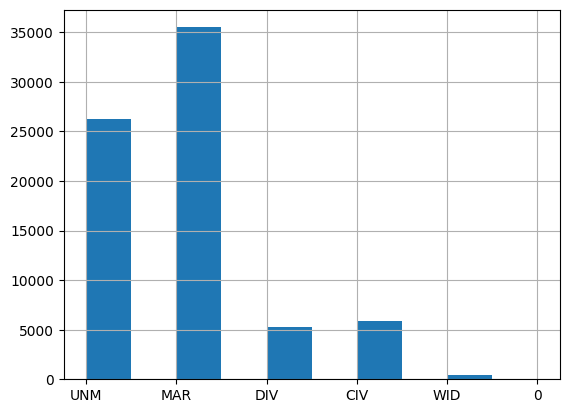

In [199]:
df['marital_status_cd'].hist()

In [200]:
df['is_Moscow'] = df['region'] == 'Москва'
df['is_pik'] = df['offencetime'].isin([8, 9, 18, 19])
X = df[df['marital_status_cd'] == 'UNM'][['is_Moscow', 'public_holiday', 'is_pik']]
X = sm.add_constant(X)
Y = df[df['marital_status_cd'] == 'UNM'][['speed']]
X['is_Moscow'] = X['is_Moscow'].astype('int')
X['is_pik'] = X['is_pik'].astype('int')
Y['speed'] = Y['speed'].astype('int')
model = sm.OLS(np.asarray(Y), np.asarray(X))
res = model.fit()
print(res.summary())

# не женаты

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     2167.
Date:                Sun, 22 Sep 2024   Prob (F-statistic):               0.00
Time:                        11:26:41   Log-Likelihood:                -12040.
No. Observations:               26252   AIC:                         2.409e+04
Df Residuals:                   26248   BIC:                         2.412e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8764      0.003    257.320      0.0

In [201]:
df['is_Moscow'] = df['region'] == 'Москва'
df['is_pik'] = df['offencetime'].isin([8, 9, 18, 19])
X = df[df['marital_status_cd'] == 'MAR'][['is_Moscow', 'public_holiday', 'is_pik']]
X = sm.add_constant(X)
Y = df[df['marital_status_cd'] == 'MAR'][['speed']]
X['is_Moscow'] = X['is_Moscow'].astype('int')
X['is_pik'] = X['is_pik'].astype('int')
Y['speed'] = Y['speed'].astype('int')
model = sm.OLS(np.asarray(Y), np.asarray(X))
res = model.fit()
print(res.summary())

# женаты

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     3428.
Date:                Sun, 22 Sep 2024   Prob (F-statistic):               0.00
Time:                        11:26:55   Log-Likelihood:                -16271.
No. Observations:               35507   AIC:                         3.255e+04
Df Residuals:                   35503   BIC:                         3.258e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8683      0.003    296.847      0.0

In [203]:
df['is_Moscow'] = df['region'] == 'Москва'
df['is_pik'] = df['offencetime'].isin([8, 9, 18, 19])
X = df[df['marital_status_cd'] != 'MAR'][df['marital_status_cd'] != 'UNM'][['is_Moscow', 'public_holiday', 'is_pik']]
X = sm.add_constant(X)
Y = df[df['marital_status_cd'] != 'MAR'][df['marital_status_cd'] != 'UNM'][['speed']]
X['is_Moscow'] = X['is_Moscow'].astype('int')
X['is_pik'] = X['is_pik'].astype('int')
Y['speed'] = Y['speed'].astype('int')
model = sm.OLS(np.asarray(Y), np.asarray(X))
res = model.fit()
print(res.summary())

# остальное

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     2494.
Date:                Sun, 22 Sep 2024   Prob (F-statistic):               0.00
Time:                        11:28:09   Log-Likelihood:                -15090.
No. Observations:               32891   AIC:                         3.019e+04
Df Residuals:                   32887   BIC:                         3.022e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8690      0.003    281.652      0.0

<Axes: >

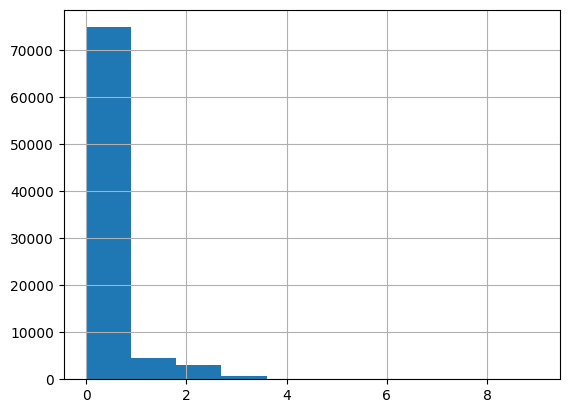

In [204]:
df['children_cnt'].hist()

In [208]:
df['is_Moscow'] = df['region'] == 'Москва'
df['is_pik'] = df['offencetime'].isin([8, 9, 18, 19])
X = df[df['children_cnt'] == 0][['is_Moscow', 'public_holiday', 'is_pik']]
X = sm.add_constant(X)
Y = df[df['children_cnt'] == 0][['speed']]
X['is_Moscow'] = X['is_Moscow'].astype('int')
X['is_pik'] = X['is_pik'].astype('int')
Y['speed'] = Y['speed'].astype('int')
model = sm.OLS(np.asarray(Y), np.asarray(X))
res = model.fit()
print(res.summary())

# 0 детей

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     6387.
Date:                Sun, 22 Sep 2024   Prob (F-statistic):               0.00
Time:                        11:30:14   Log-Likelihood:                -34337.
No. Observations:               74882   AIC:                         6.868e+04
Df Residuals:                   74878   BIC:                         6.872e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8727      0.002    429.954      0.0

In [214]:
df['is_Moscow'] = df['region'] == 'Санкт-Петербург'
df['is_pik'] = df['offencetime'].isin([8, 9, 18, 19])
X = df[['is_Moscow', 'public_holiday', 'is_pik']]
X = sm.add_constant(X)
Y = df[['speed']]
X['is_Moscow'] = X['is_Moscow'].astype('int')
X['is_pik'] = X['is_pik'].astype('int')
Y['speed'] = Y['speed'].astype('int')
model = sm.OLS(np.asarray(Y), np.asarray(X))
res = model.fit()
print(res.summary())

# не 0 детей

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     838.1
Date:                Sun, 22 Sep 2024   Prob (F-statistic):               0.00
Time:                        11:39:40   Log-Likelihood:                -52976.
No. Observations:               94650   AIC:                         1.060e+05
Df Residuals:                   94646   BIC:                         1.060e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7342      0.002    406.807      0.0

In [210]:
df['is_Moscow'] = df['region'] == 'Москва'
df['is_pik'] = df['offencetime'].isin([8, 9, 18, 19])
X = df[df['gear_type'] == 'Механическая'][['is_Moscow', 'public_holiday', 'is_pik']]
X = sm.add_constant(X)
Y = df[df['gear_type'] == 'Механическая'][['speed']]
X['is_Moscow'] = X['is_Moscow'].astype('int')
X['is_pik'] = X['is_pik'].astype('int')
Y['speed'] = Y['speed'].astype('int')
model = sm.OLS(np.asarray(Y), np.asarray(X))
res = model.fit()
print(res.summary())

# механическая коробка

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     1829.
Date:                Sun, 22 Sep 2024   Prob (F-statistic):               0.00
Time:                        11:33:21   Log-Likelihood:                -9082.2
No. Observations:               18928   AIC:                         1.817e+04
Df Residuals:                   18924   BIC:                         1.820e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8290      0.004    211.460      0.0

In [211]:
df['is_Moscow'] = df['region'] == 'Москва'
df['is_pik'] = df['offencetime'].isin([8, 9, 18, 19])
X = df[df['gear_type'] != 'Механическая'][['is_Moscow', 'public_holiday', 'is_pik']]
X = sm.add_constant(X)
Y = df[df['gear_type'] != 'Механическая'][['speed']]
X['is_Moscow'] = X['is_Moscow'].astype('int')
X['is_pik'] = X['is_pik'].astype('int')
Y['speed'] = Y['speed'].astype('int')
model = sm.OLS(np.asarray(Y), np.asarray(X))
res = model.fit()
print(res.summary())

# не механическая коробка

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     6510.
Date:                Sun, 22 Sep 2024   Prob (F-statistic):               0.00
Time:                        11:33:53   Log-Likelihood:                -33961.
No. Observations:               75722   AIC:                         6.793e+04
Df Residuals:                   75718   BIC:                         6.797e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8833      0.002    437.141      0.0

In [213]:
# Седан (4 дв.)
# 
# df['is_Moscow'] = df['region'] == 'Москва'
# df['is_pik'] = df['offencetime'].isin([8, 9, 18, 19])
# X = df[df['body_type'] == 'Седан (4 дв.)'][['is_Moscow', 'public_holiday', 'is_pik']]
# X = sm.add_constant(X)
# Y = df[df['body_type'] == 'Седан (4 дв.)'][df['gear_type'] != 'Механическая'][['speed']]
# X['is_Moscow'] = X['is_Moscow'].astype('int')
# X['is_pik'] = X['is_pik'].astype('int')
# Y['speed'] = Y['speed'].astype('int')
# model = sm.OLS(np.asarray(Y), np.asarray(X))
# res = model.fit()
# print(res.summary())

# не механическая коробка

SyntaxError: invalid syntax (1078556707.py, line 1)

In [223]:
bd['gender_cd'][bd['gender_cd'] != '32'].dropna()

0        M
1        M
2        M
3        M
4        F
        ..
97302    F
97303    M
97304    M
97305    M
97306    M
Name: gender_cd, Length: 94526, dtype: object

In [240]:
r = [bd[bd['region'] == 'Москва']['party_rk'].count(), bd[bd['region'] == 'Московская область']['party_rk'].count(), bd[bd['region'] == 'Санкт-Петербург']['party_rk'].count()]
regions = pd.DataFrame({'region' : ['Москва', 'Московская oбласть', 'Санкт-Петербург', 'Остальное'], 'count' : r+[bd['party_rk'].count() - sum(r)]})
regions

,region,count
0,Москва,27351
1,Московская oбласть,14949
2,Санкт-Петербург,6022
3,Остальное,46328


In [235]:
import seaborn as sns

In [243]:
deti = pd.DataFrame({'наличие детей' : ['нет', 'есть'], 'количество людей' : [bd[bd['children_cnt'] == 0]['party_rk'].count(), bd[bd['children_cnt'] != 0]['party_rk'].count()]})
deti

,наличие детей,количество людей
0,нет,74882
1,есть,19768


In [244]:
bd['gear_type'].value_counts()

gear_type
Автоматическая    75722
Механическая      18928
Name: count, dtype: int64

In [245]:
bd['offenceshortstatement'].value_counts()

offenceshortstatement
Превышение скорости на 20-40 км/ч                                                              66628
Нарушение разметки                                                                              7779
Не пристегнут ремень безопасности                                                               6119
Повторное превышение скорости на 40-60 км/ч                                                     2637
Превышение скорости на 40-60 км/ч                                                               1741
Использование телефона за рулем                                                                 1309
Движение по обочине                                                                             1270
Движение по выделенной полосе (Москва и Санкт-Петербург)                                        1119
Повторный проезд на запрещ.сигнал светофора                                                      987
Пересечение стоп-линии                                               

In [247]:
molitva = [66628, 7779, 6119, 2637, 1741, 1309, 1270, 1119]
narushaem = pd.DataFrame({'Нарушения' : ['Превышение скорости на 20-40 км/ч', 'Нарушение разметки', 'Не пристегнут ремень безопасности', 'Повторное превышение скорости на 40-60 км/ч', 'Превышение скорости на 40-60 км/ч', 'Использование телефона за рулем', 'Движение по обочине', 'Движение по выделенной полосе (Москва и Санкт-Петербург)', 'Остальное'], 'Количество наршений' : molitva+[bd['party_rk'].count() - sum(molitva)]})
narushaem

,Нарушения,Количество наршений
0,Превышение скорости на 20-40 км/ч,66628
1,Нарушение разметки,7779
2,Не пристегнут ремень безопасности,6119
3,Повторное превышение скорости на 40-60 км/ч,2637
4,Превышение скорости на 40-60 км/ч,1741
5,Использование телефона за рулем,1309
6,Движение по обочине,1270
7,Движение по выделенной полосе (Москва и Санкт-Петербург),1119
8,Остальное,6048


In [248]:
# s.isna().sum()

bd.columns

Index(['party_rk', 'region', 'offenceshortstatement', 'offencedate',
       'offencetime', 'engine_type', 'engine_power', 'body_type', 'auto_mark',
       'auto_year', 'auto_model', 'color', 'gear_type', 'car_price',
       'gender_cd', 'age', 'marital_status_cd', 'children_cnt',
       'education_level_cd', 'person_monthly_income_amt', 'day_of_week',
       'public_holiday', 'speed', 'is_Moscow', 'is_pik'],
      dtype='object')

<BarContainer object of 7 artists>

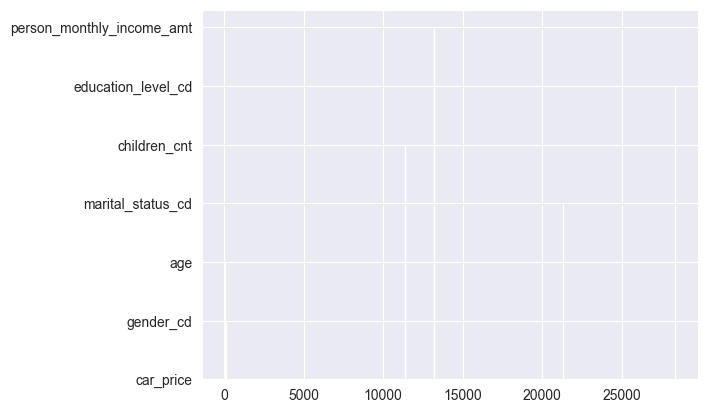

In [268]:
stolbs = []
countNa = []
for i in bd.columns:
    if int(bd[str(i)].isna().sum()) != 0:
        stolbs.append(i)
        countNa.append(int(bd[str(i)].isna().sum()))
countNaN = pd.DataFrame({'столбец' : stolbs, 'количество Na' : countNa})
countNaN


In [259]:
int(bd['age'].isna().sum())

9

In [261]:
bd

,party_rk,region,offenceshortstatement,offencedate,offencetime,engine_type,engine_power,body_type,auto_mark,auto_year,...,age,marital_status_cd,children_cnt,education_level_cd,person_monthly_income_amt,day_of_week,public_holiday,speed,is_Moscow,is_pik
0,622025641,Москва,Движение по обочине,2024-05-15,9,1.8,152.0,Универсал (5 дв.),SKODA,2011.0,...,25.0,UNM,0.0,UGR,80.0,Среда,0,False,False,True
1,696133759,Воронежская область,Превышение скорости на 40-60 км/ч,2024-05-13,17,1.6,73.0,Седан (4 дв.),LADA (ВАЗ),2011.0,...,20.0,NaN,0.0,NaN,45.0,Понедельник,0,True,False,False
2,1057242004,Севастополь,Превышение скорости на 20-40 км/ч,2024-05-10,0,2.5,145.0,Микроавтобус (5 дв.),HYUNDAI,2018.0,...,45.0,NaN,NaN,NaN,500.0,Пятница,1,True,False,False
3,300624658,Республика Тыва,Превышение скорости на 20-40 км/ч,2024-05-02,21,2.0,150.0,Седан (4 дв.),MITSUBISHI,2007.0,...,30.0,UNM,0.0,SCH,35.0,Четверг,0,True,False,False
4,702484296,Воронежская область,Превышение скорости на 20-40 км/ч,2024-04-28,16,2.3,155.0,Универсал (5 дв.),FORD,2004.0,...,45.0,MAR,0.0,GRD,50.0,Воскресенье,1,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97302,697259855,Челябинская область,Превышение скорости на 20-40 км/ч,2024-05-16,9,2.5,171.0,Универсал (5 дв.),NISSAN,2019.0,...,45.0,NaN,0.0,NaN,200.0,Четверг,0,True,False,True
97303,621105050,Москва,Нарушение разметки,2024-05-22,18,1.6,98.0,Универсал (5 дв.),LADA (ВАЗ),2011.0,...,45.0,MAR,0.0,GRD,125.0,Среда,0,False,False,True
97304,959033708,Брянская область,Превышение скорости на 20-40 км/ч,2024-05-14,16,1.6,109.0,Универсал (5 дв.),CHEVROLET,2007.0,...,50.0,UNM,0.0,NaN,35.0,Вторник,0,True,False,False
97305,231902303,Москва,Не пропустил пешехода,2024-05-16,11,2.0,151.0,Хэтчбек (5 дв.),DODGE,2010.0,...,35.0,MAR,0.0,GRD,200.0,Четверг,0,False,False,False


In [271]:
bd['person_monthly_income_amt'].mean()

np.float64(10843.885985689916)

<Axes: >

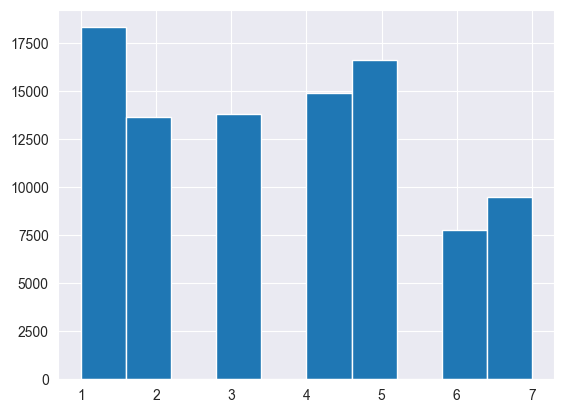

In [274]:
bd['day_of_week'].hist()